# Faculty_Notebook-Day01

### K - Means

K-means algorithm is the most popular and yet simplest of all the clustering algorithms.

- Select the number of clusters  k  that you think is the optimal number.
- Initialize  k  points as "centroids" randomly within the space of our data.
- Attribute each observation to its closest centroid.
- Update the centroids to the center of all the attributed set of observations.
- Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).
- This algorithm is easy to describe and visualize. Let's take a look.

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv("abalone.csv",header=None,names=['Gender','Length','Diameter','Height','Weight','MeatWeight','GutWeight','ShellWeight','Rings'])

In [39]:
df.head()

,Gender,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [40]:
df['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

In [41]:
df_rows , df_cols = df.shape
print(df_rows)
print(df_cols)

4177
9


In [42]:
df2 = df.loc[:, 'Length':'Rings']

In [43]:
df2.head()

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


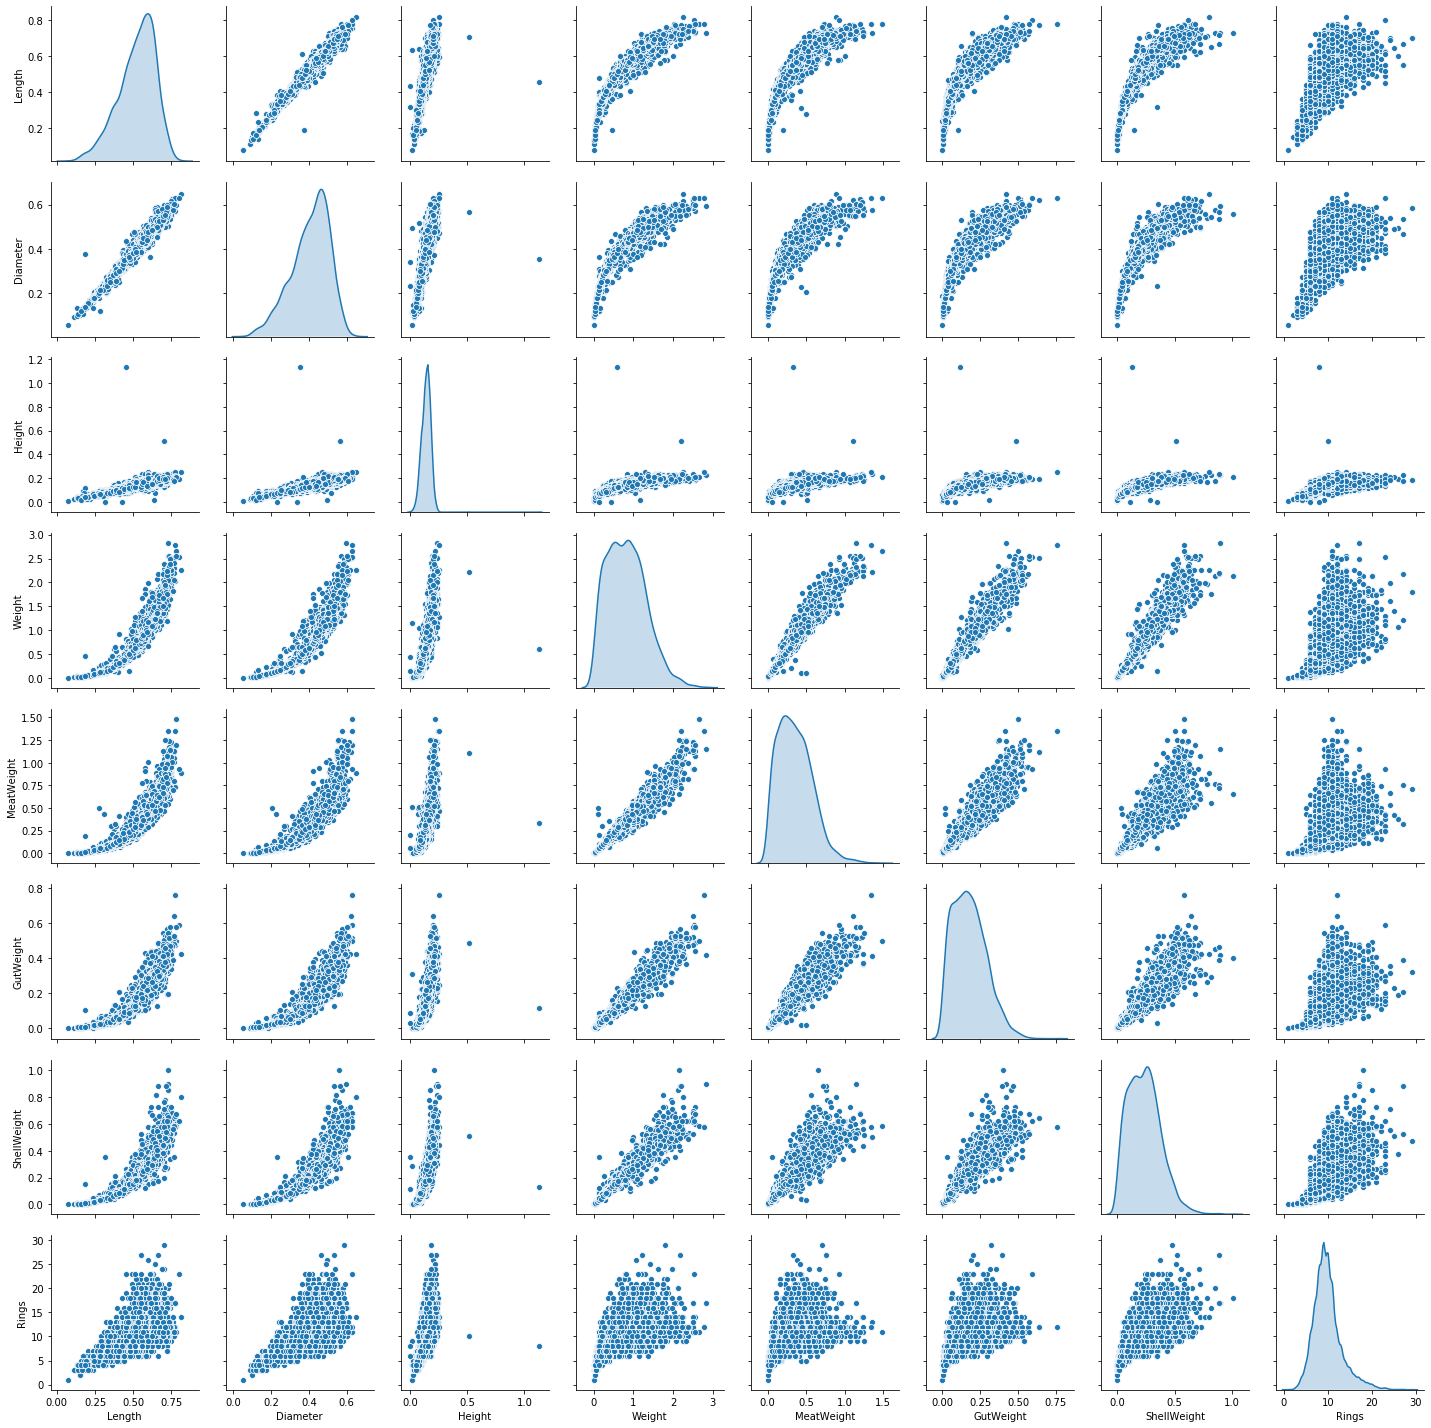

In [44]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

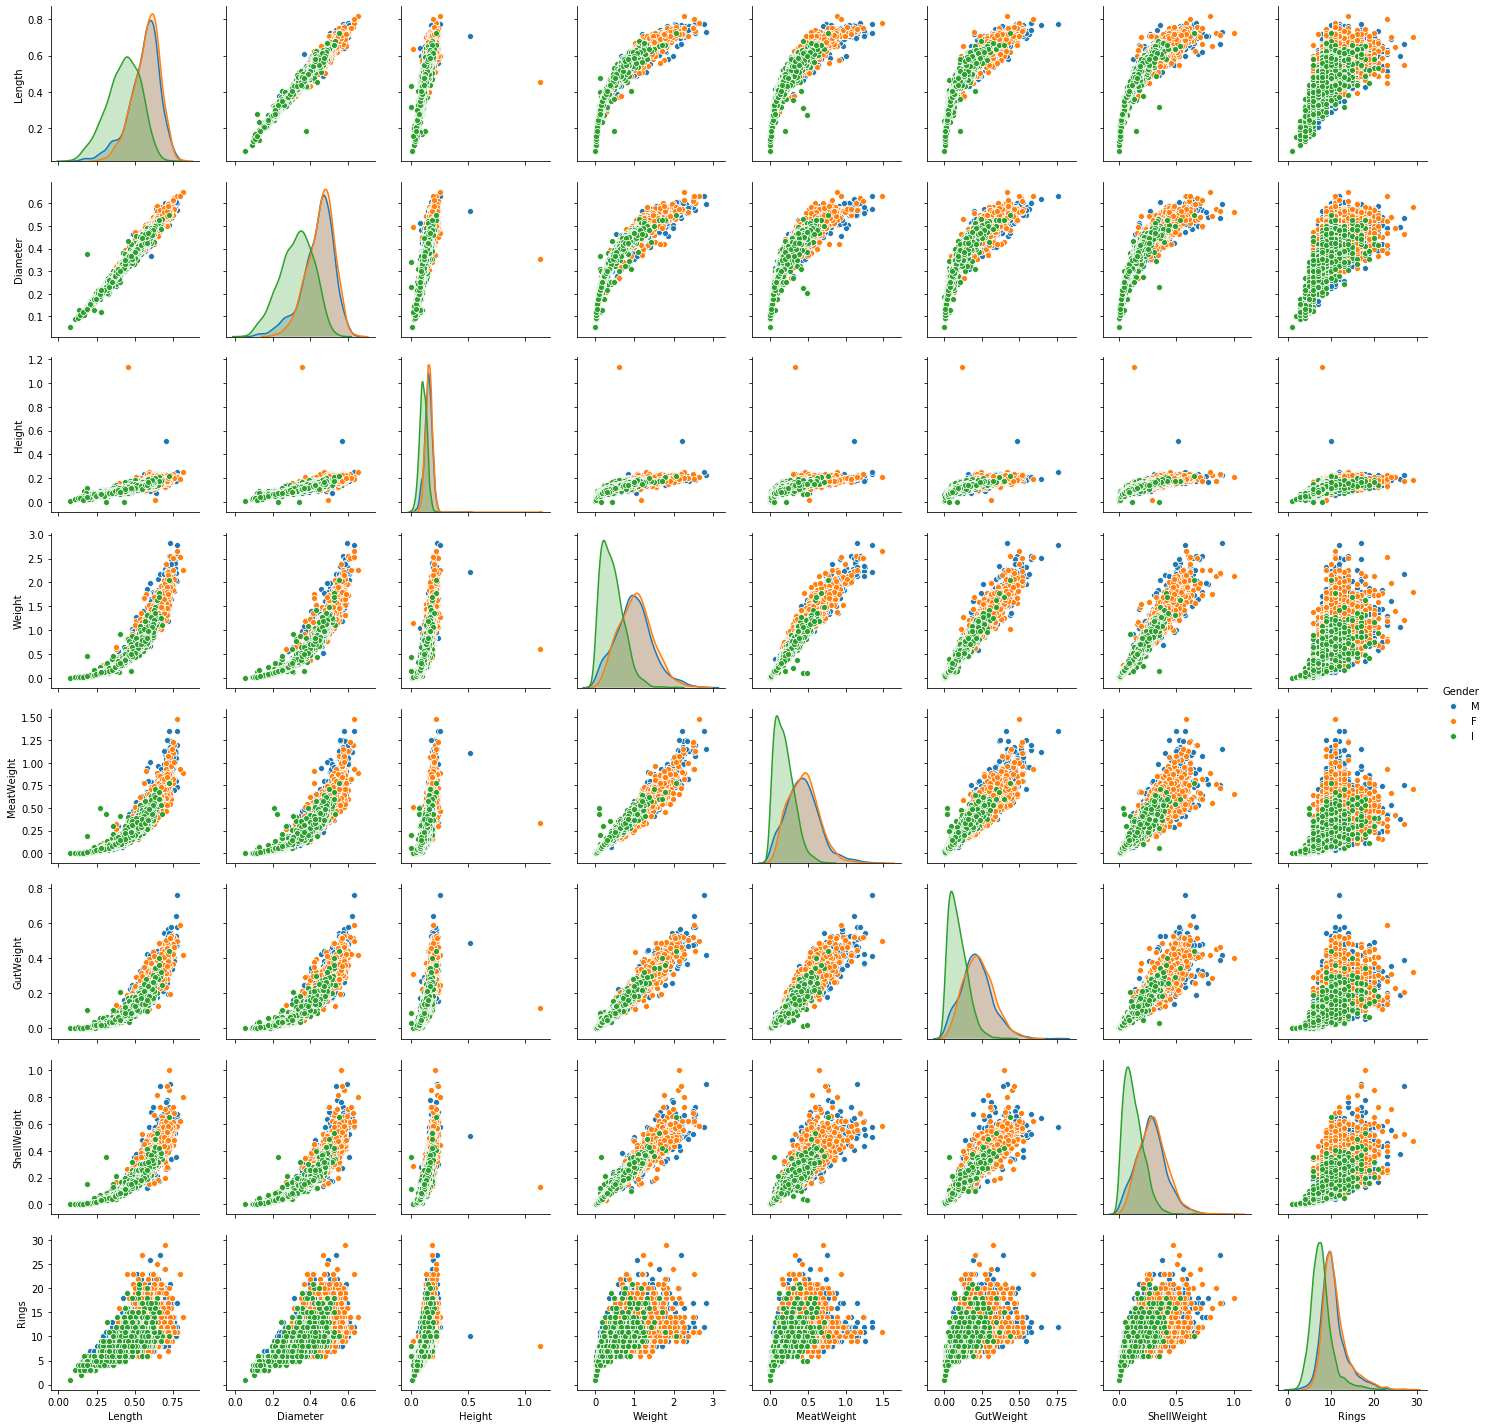

In [45]:
sns.pairplot(df,diag_kind='kde',hue ='Gender')

In [46]:
df_scaled = df2.apply(zscore)

In [47]:
df_scaled.head()

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [48]:
model = KMeans(n_clusters = 3)

In [49]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,33416.000000
1,2,14612.656454
2,3,9922.791125
3,4,7867.639052
4,5,6799.372418
5,6,5837.505550
6,7,5282.110543
7,8,4752.477695
8,9,4287.891830
9,10,3929.173159


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

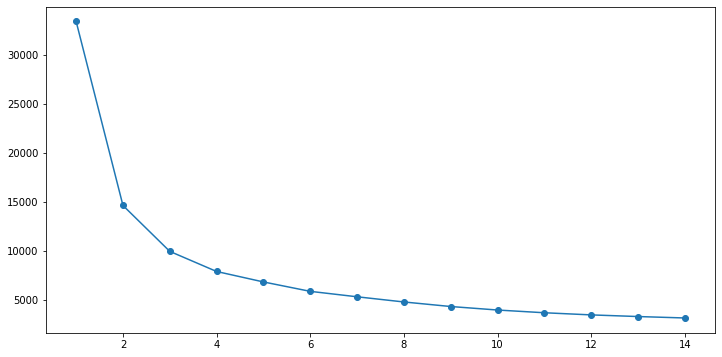

In [51]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [52]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [53]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [54]:
centroids = kmeans.cluster_centers_

In [28]:
centroids

array([[ 1.04019844,  1.04623397,  0.98517446,  1.22719519,  1.18374984,
         1.203935  ,  1.18219995,  0.62456642],
       [-1.27097647, -1.27197976, -1.11530254, -1.13441221, -1.08162763,
        -1.11329067, -1.12449672, -0.85235698],
       [ 0.1415367 ,  0.13809487,  0.0748725 , -0.07727477, -0.08298582,
        -0.07555581, -0.05324566,  0.14468346]])

In [29]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [30]:
centroid_df

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,1.040198,1.046234,0.985174,1.227195,1.183750,1.203935,1.182200,0.624566
1,-1.270976,-1.271980,-1.115303,-1.134412,-1.081628,-1.113291,-1.124497,-0.852357
2,0.141537,0.138095,0.074873,-0.077275,-0.082986,-0.075556,-0.053246,0.144683


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [31]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [32]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
snail_df_labeled = df2.join(df_labels)

In [55]:
snail_df_labeled.head()

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings,labels
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [33]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings,labels
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [34]:
snail_df_labeled['labels'].value_counts()   #0-Infant, 1-Female, 2-Male

2    1778
0    1214
1    1185
Name: labels, dtype: int64

In [35]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

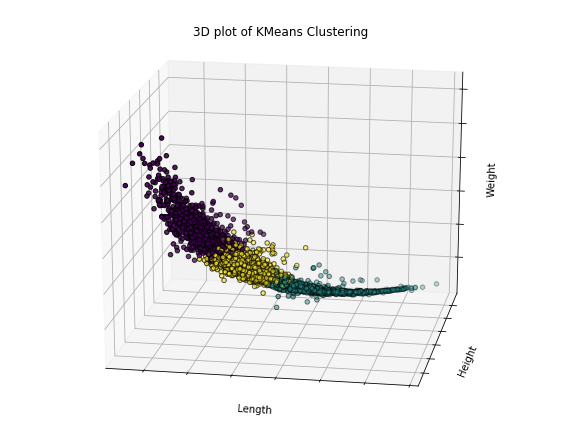

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')


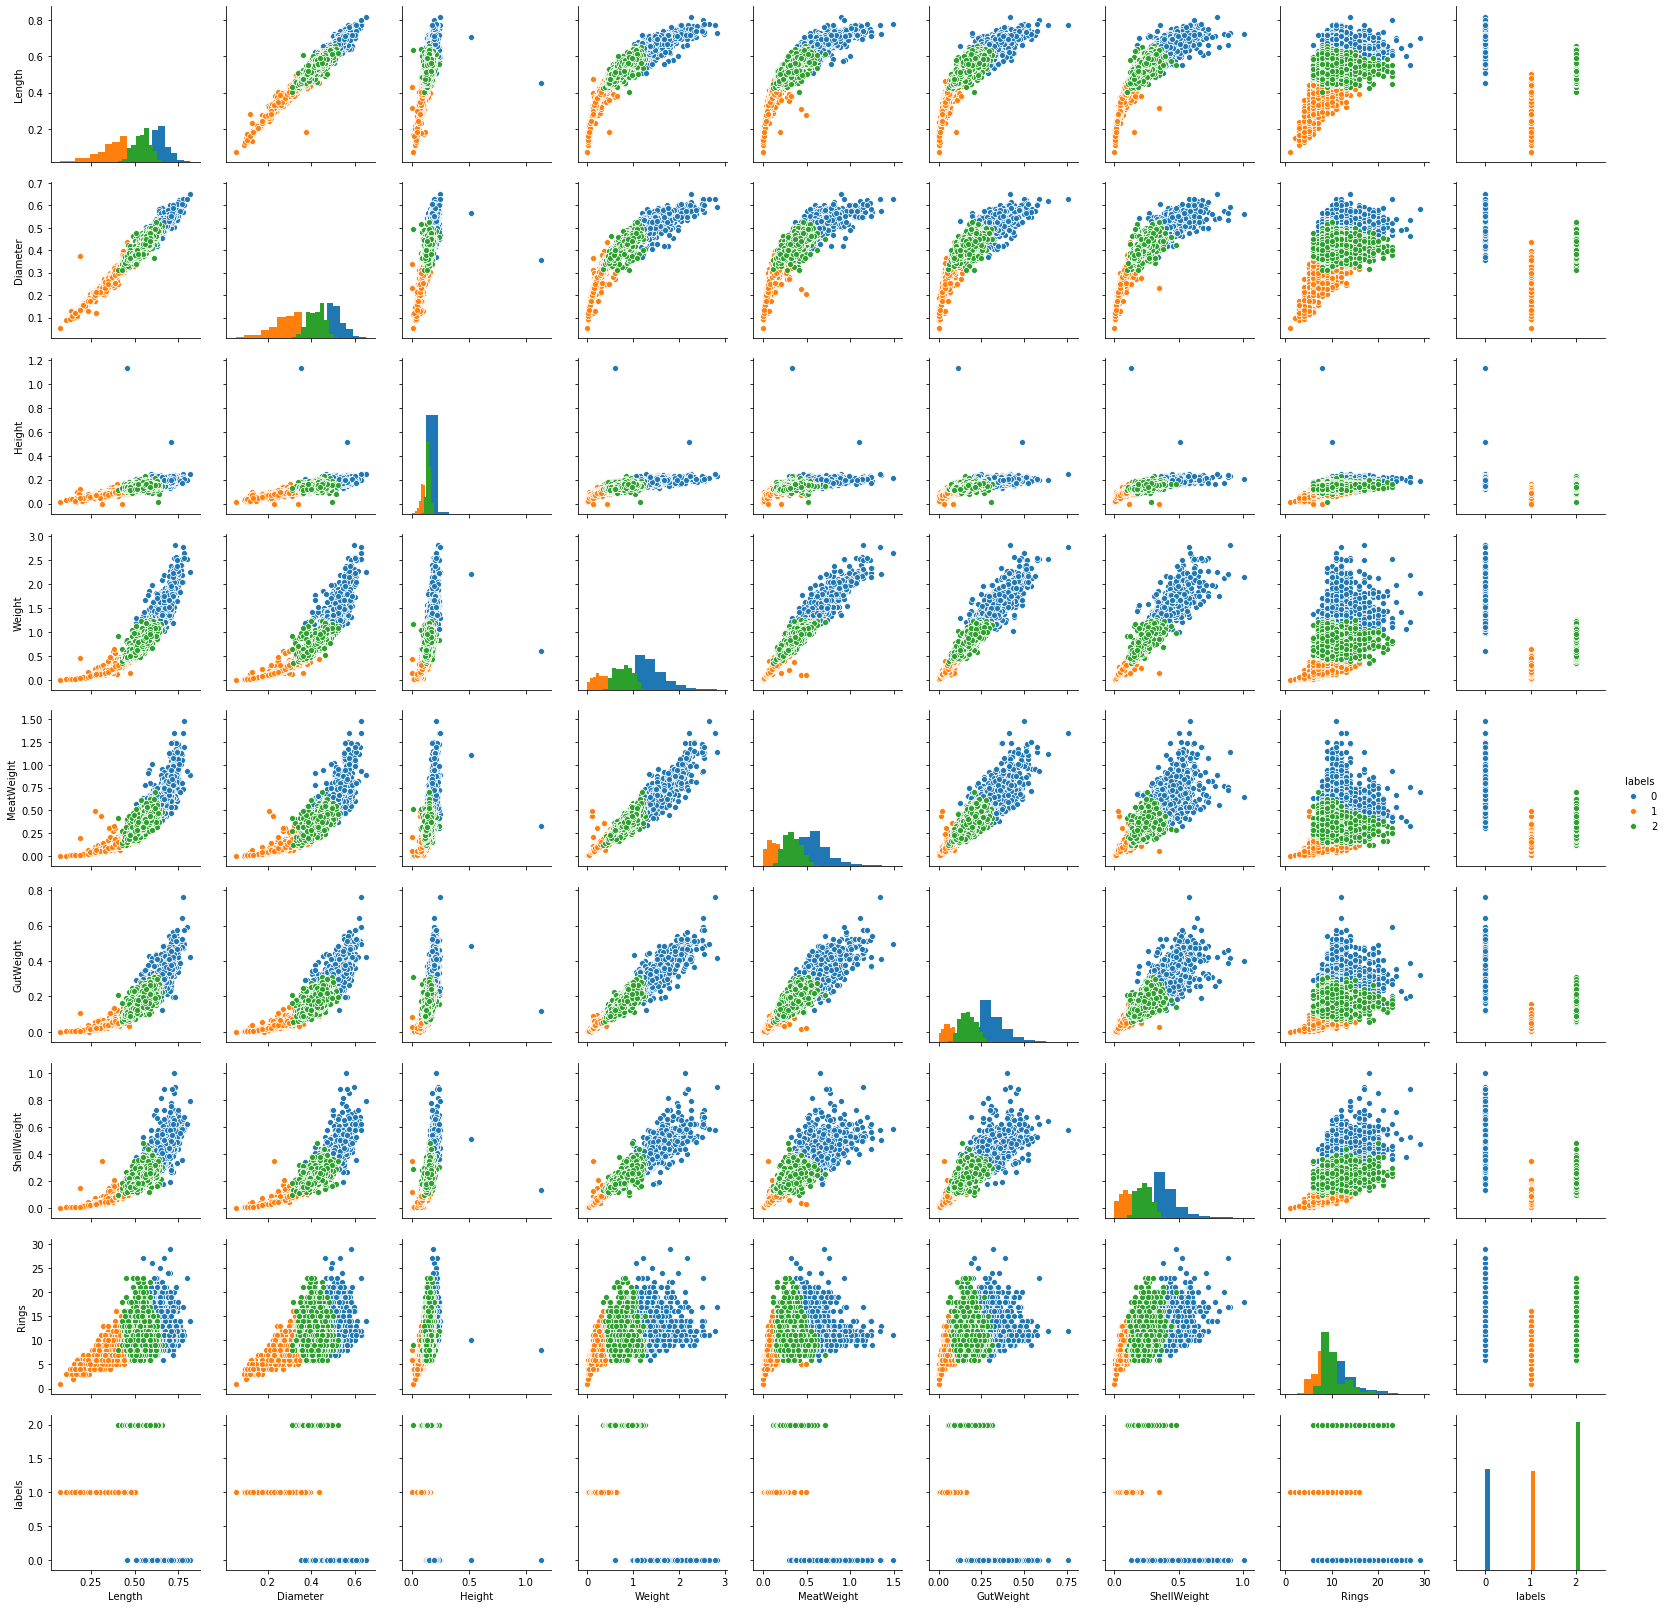

In [62]:
sns.pairplot(snail_df_labeled,diag_kind ='hist',hue = 'labels')

In [59]:
snail_df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Length       4177 non-null   float64 
 1   Diameter     4177 non-null   float64 
 2   Height       4177 non-null   float64 
 3   Weight       4177 non-null   float64 
 4   MeatWeight   4177 non-null   float64 
 5   GutWeight    4177 non-null   float64 
 6   ShellWeight  4177 non-null   float64 
 7   Rings        4177 non-null   int64   
 8   labels       4177 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB
